In [5]:
# Day 85 - Time Series Forecasting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# ---------------- Create synthetic time series data ----------------
date_rng = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
np.random.seed(42)
temperature = 20 + np.sin(np.linspace(0, 3 * np.pi, len(date_rng))) * 10 + np.random.normal(0, 2, len(date_rng))
df = pd.DataFrame({'Date': date_rng, 'Temperature': temperature})
df.set_index('Date', inplace=True)

In [6]:
# ---------------- Train-Test Split ----------------
train = df.iloc[:-60]
test = df.iloc[-60:]

In [7]:
# ---------------- ARIMA Forecasting ----------------
print("---- ARIMA Model ----")
model = ARIMA(train['Temperature'], order=(3,1,2))
arima_result = model.fit()
forecast_arima = arima_result.forecast(steps=60)

---- ARIMA Model ----


C:\Users\amank\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\amank\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\amank\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [8]:
# ---------------- Linear Regression Forecasting ----------------
print("\n---- Linear Regression Model ----")
df['t'] = np.arange(len(df))
train_lr = df.iloc[:-60]
test_lr = df.iloc[-60:]

X_train, y_train = train_lr[['t']], train_lr['Temperature']
X_test, y_test = test_lr[['t']], test_lr['Temperature']

lr = LinearRegression()
lr.fit(X_train, y_train)
forecast_lr = lr.predict(X_test)


---- Linear Regression Model ----


In [9]:
# ---------------- Evaluation ----------------
mae_arima = mean_absolute_error(test['Temperature'], forecast_arima)
rmse_arima = sqrt(mean_squared_error(test['Temperature'], forecast_arima))

mae_lr = mean_absolute_error(y_test, forecast_lr)
rmse_lr = sqrt(mean_squared_error(y_test, forecast_lr))

print(f"ARIMA -> MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")
print(f"Linear Regression -> MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}")

ARIMA -> MAE: 3.89, RMSE: 4.60
Linear Regression -> MAE: 2.74, RMSE: 3.40


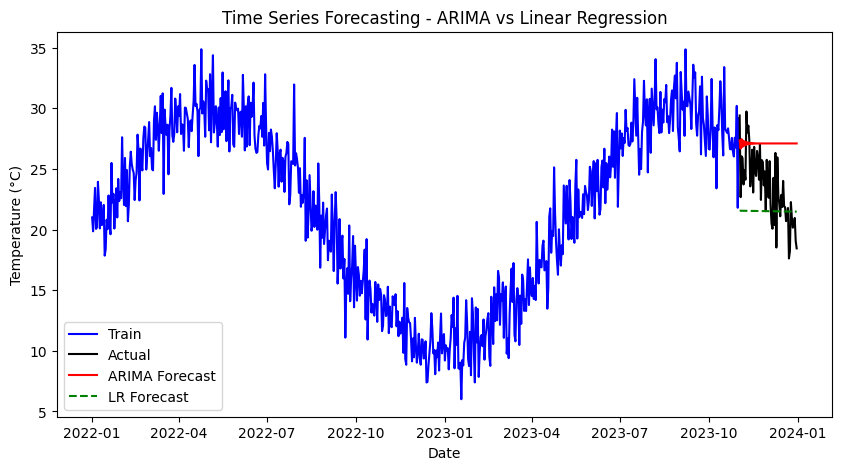

In [10]:
# ---------------- Visualization ----------------
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Temperature'], label='Train', color='blue')
plt.plot(test.index, test['Temperature'], label='Actual', color='black')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast', color='red')
plt.plot(test.index, forecast_lr, label='LR Forecast', color='green', linestyle='--')
plt.title('Time Series Forecasting - ARIMA vs Linear Regression')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()
